In [5]:
import tensorflow as tf
import scipy
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Create model
model = Sequential([
    base_model,
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         1474688   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               295168    
                                                                 
 dense_3 (Dense)             (None, 10)               

In [7]:
path = "/content/drive/MyDrive/a2"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use training subset
)

validation_generator = train_datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use validation subset
)

Found 480 images belonging to 10 classes.
Found 120 images belonging to 10 classes.


In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

test_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to the range [0, 1]
)

test_generator = test_datagen.flow_from_directory(
    path,
    target_size=(224, 224),  # Resize all images to 224x224 pixels
    batch_size=32,
    class_mode='categorical'
)

Epoch 1/10
15/15 [==============================] - 218s 14s/step - loss: 2.6779 - accuracy: 0.5458 - val_loss: 0.6595 - val_accuracy: 0.7917
Epoch 2/10
15/15 [==============================] - 41s 3s/step - loss: 0.1806 - accuracy: 0.9354 - val_loss: 0.3650 - val_accuracy: 0.8854
Epoch 3/10
15/15 [==============================] - 41s 3s/step - loss: 0.0656 - accuracy: 0.9812 - val_loss: 0.5627 - val_accuracy: 0.8542
Epoch 4/10
15/15 [==============================] - 47s 3s/step - loss: 0.0348 - accuracy: 0.9875 - val_loss: 0.2672 - val_accuracy: 0.9271
Epoch 5/10
15/15 [==============================] - 36s 2s/step - loss: 0.0168 - accuracy: 0.9937 - val_loss: 0.4965 - val_accuracy: 0.8854
Epoch 6/10
15/15 [==============================] - 38s 2s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.4262 - val_accuracy: 0.8958
Epoch 7/10
15/15 [==============================] - 37s 2s/step - loss: 0.0056 - accuracy: 0.9958 - val_loss: 0.4258 - val_accuracy: 0.8958
Epoch 8/10
15/15 [

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("Test Accuracy:", test_acc)

# Make predictions
predictions = model.predict(test_generator)

19/19 - 29s - loss: 0.0803 - accuracy: 0.9800 - 29s/epoch - 2s/step
Test Accuracy: 0.9800000190734863
19/19 [==============================] - 30s 1s/step


# Tester

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image
import io

In [23]:
# Define function to load and preprocess images from URL
def load_and_preprocess_image(url):
    # Fetch image from URL
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    # Resize image to match model input shape
    img = img.resize((224, 224))
    # Convert image to array and normalize pixel values
    img = np.array(img) / 255.0
    # Expand dimensions to match model input shape
    img = np.expand_dims(img, axis=0)
    return img

In [51]:
image_dictionary = {
    0:"Butterfly",
    1:"Cat",
    2:"Deer",
    3:"Dog",
    4:"Eagle",
    5:"Horse",
    6:"Lion",
    7:"Octopus",
    8:"Shark",
    9:"Zebra"
}

In [57]:
# Example URLs
image_urls = [
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzNc7ttzNg3xoNfkyps_c2QTsT1ZHTCfV0EbxpWA3xJA&s',
     # Add more URLs as needed
]

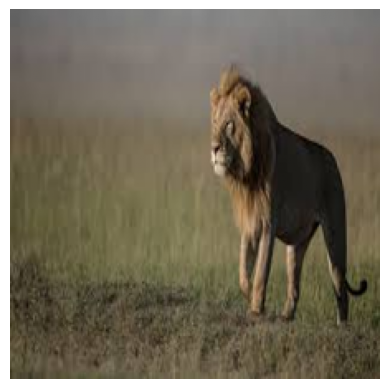

1/1 [==============================] - 0s 62ms/step
Predicted Class: Lion, Image: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzNc7ttzNg3xoNfkyps_c2QTsT1ZHTCfV0EbxpWA3xJA&s


In [58]:
for url in image_urls:
    # Preprocess image
    img = load_and_preprocess_image(url)

    # Plot image
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

    # Make prediction
    prediction = model.predict(img)
    # Get the predicted class
    predicted_class = np.argmax(prediction)
    print(f"Predicted Class: {image_dictionary[predicted_class]}, Image: {url}")